In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Initialization
# Generate random solutions to cover diversity solutions in the soluiton space
# For example the antibodies in the immune system
LB , UB = -10, 10
dim = 2
popSize = 10
population = np.random.uniform(LB, UB, (popSize, dim))


In [ ]:
def sphere(x):
    return np.sum(x**2)

In [ ]:
# Affinity Maturation
Evalution = np.array([sphere(i) for i in population])
BestEval = np.min(Evalution)
BestSol = population[np.argmin(Evalution)]

In [ ]:
# Clonal selection algorithm
MaxItr = 200
cloneNum = 100
LB , UB = -50, 50
dim = 100
popSize = 50
# Generate a population of T-cells (Solutions)
population = np.random.uniform(LB, UB, (popSize, dim))
# Matching procedure (Evaluation)
Evalution = np.array([sphere(i) for i in population])
# Keep an elitism that saves the best T-cell (best solution) 
BestEval = np.min(Evalution)
BestSol = population[np.argmin(Evalution)]
# T-cells migration process from thymus and bone marrow
for Itr in range(MaxItr):
    for i in range(popSize):
        # The cloning process
        for _ in range(cloneNum):
            # Affinity maturation
            population[i] = population[i] + np.random.uniform() *(BestSol - population[i])
            Evalution[i] = sphere(population[i])
            if Evalution[i]<=BestEval:
                BestEval = Evalution[i]
                BestSol = population[i]
    population = np.random.uniform(LB, UB, (popSize, dim))


In [ ]:
BestEval, BestSol


In [ ]:
from HeuristicApproach_Stochastic import *

In [ ]:
# GenerateProblems(NumberOfProblems = 10, MinTransCost = 30, MaxTransCost = 80, MinFixedCost = 70, MaxFixedCost = 120\
#                      , NumberOFDistCenter = 10, NumberOfPlants = 5, MinDemand = 20,  MaxDemand = 50, MinCapacity = 50\
#                         , MaxCapacity = 100)
GenerateProblems(NumberOFDistCenter=10, NumberOfPlants= 20)

In [ ]:
Capacities, Demands, FixedCosts, TransPortationCosts = ReadProblem('ProblemStochastic 10X20_10')

In [ ]:
sol = solStucture(Demands, Capacities)

In [ ]:
sol.Demands['Expected Demand'].sum()

In [ ]:
sol.Capacities.sum()

In [ ]:
sol.GenerateSolution()

In [ ]:
sol.Evaluate(TransPortationCosts, FixedCosts)

In [ ]:
sol.solution

In [ ]:
sol.DistCenterArray, sol.PlantArray

In [ ]:
import copy
# Clonal selection algorithm
MaxItr = 50
cloneNum = 10
popSize = 10
# Read problem
Capacities, Demands, FixedCosts, TransPortationCosts = ReadProblem('ProblemStochastic 10X20_10')
# Generate a population of T-cells (Solutions)
population = [solStucture(Demands, Capacities) for _ in range(popSize)]
# Matching procedure (Evaluation)
Evalution = np.array([i.Evaluate(TransPortationCosts, FixedCosts) for i in population])
# Keep an elitism that saves the best T-cell (best solution) 
BestEval = np.min(Evalution)
BestSol = population[np.argmin(Evalution)]
# T-cells migration process from thymus and bone marrow
for Itr in range(MaxItr):
    for i in range(popSize):
        # The cloning process
        for _ in range(cloneNum):
            # Affinity maturation
            # population[i] = population[i] + np.random.uniform() *(BestSol - population[i])
            population[i].DistCenterArray = population[i].DistCenterArray + np.random.uniform() * \
            (BestSol.DistCenterArray - population[i].DistCenterArray)
            population[i].PlantArray = population[i].PlantArray + np.random.uniform() * \
            (BestSol.PlantArray - population[i].PlantArray)
            Evalution[i] = population[i].Evaluate(TransPortationCosts, FixedCosts)
            if Evalution[i]<=BestEval:
                BestEval = Evalution[i]
                BestSol = copy.deepcopy(population[i])
    population = [solStucture(Demands, Capacities) for _ in range(popSize)]


In [ ]:
BestEval

In [2]:
from AIS_for_SLDCP import *

In [ ]:
Eval, Sol = AISforFLDCP(MaxItr = 50, cloneNum = 10, popSize = 20,ProblemName='ProblemStochastic 10X20_10')
Eval

In [3]:
import numpy as np
import pandas as pd
from pyDOE2 import lhs

In [9]:
def normalizeCriterion(Criterion):
    return (ScaledSmaples[Criterion] - ScaledSmaples[Criterion].min())/(ScaledSmaples[Criterion].max() - ScaledSmaples[Criterion].min())

In [5]:
param_ranges = {
    "MaxItr": (5, 50),  # Maximum iterations
    "NP": (5, 15),        # Population size
    "CN": (5, 10)         # Number of cloned solutions    
}
# Step 2: Generate Latin Hypercube Samples
num_samples = 30  # Number of experiments to perform
lhs_samples = lhs(len(param_ranges), samples=num_samples)
ScaledSmaples = pd.DataFrame(lhs_samples, columns=param_ranges.keys())
ScaledSmaples['MaxItr'] = np.int32(param_ranges['MaxItr'][0] + ScaledSmaples['MaxItr'] *(param_ranges['MaxItr'][1] - param_ranges['MaxItr'][0]))
ScaledSmaples['NP'] = np.int32(param_ranges['NP'][0] + ScaledSmaples['NP'] \
    *(param_ranges['NP'][1] - param_ranges['NP'][0]))
ScaledSmaples['CN'] = np.int32(param_ranges['CN'][0] + ScaledSmaples['CN'] \
    *(param_ranges['CN'][1] - param_ranges['CN'][0]))

In [6]:
# ScaledSmaples.head()
ProbName = 'ProblemStochastic 5X10_1'
# Eval, Sol = AISforFLDCP(MaxItr = 50, cloneNum = 10, popSize = 20,ProblemName = ProbName)
ScaledSmaples['Mean'] = None
ScaledSmaples['RSD'] = None
for i in ScaledSmaples.index:
    MaxItr = ScaledSmaples.iloc[i,0]
    cloneNum = ScaledSmaples.iloc[i,1]
    popSize = ScaledSmaples.iloc[i,2]
    Results = np.array([AISforFLDCP(MaxItr, cloneNum, popSize,ProbName)[1].Eval for _ in range(10)])
    print(i)
    ResultsMean = Results.mean()
    ResultsStd = Results.std()
    ScaledSmaples.loc[i, 'Mean'] = ResultsMean
    ScaledSmaples.loc[i, 'RSD'] = ResultsMean/ResultsStd

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [10]:
ScaledSmaples.head()
ScaledSmaples['Response'] = np.float16((normalizeCriterion('MaxItr') + normalizeCriterion('RSD'))/2)
ScaledSmaples.head()

,MaxItr,NP,CN,Mean,RSD,Response
0,29,5,8,22897.3,27.993801,0.348389
1,13,9,9,22314.3,39.804022,0.321777
2,45,12,8,21886.3,31.714632,0.579102
3,5,7,6,23376.1,22.232804,0.000000
4,28,14,5,22423.2,43.936937,0.546387


In [133]:
ScaledSmaples.to_excel('ScaledSmaples0.xlsx')

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

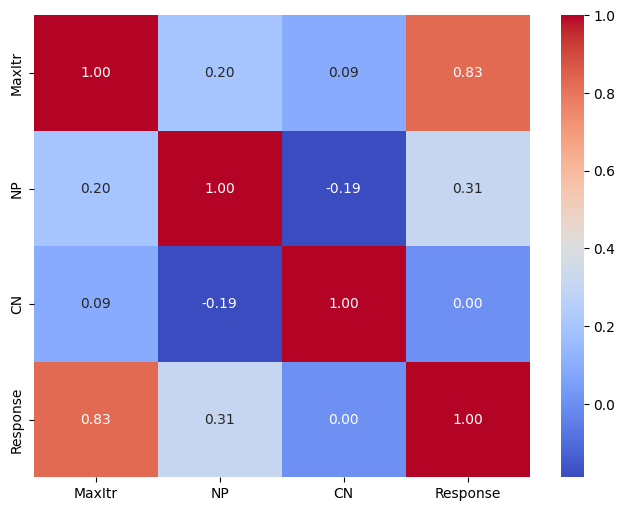

In [16]:
CorrelationMatrix = ScaledSmaples.drop(columns=['Mean', 'RSD']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(CorrelationMatrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [127]:
DOEResults = pd.read_excel('ScaledSmaples.xlsx').iloc[:,1:]

In [128]:
DOEResults.head()
print(DOEResults[DOEResults['Time'] == DOEResults['Time'].min()])
print(DOEResults[DOEResults['Mean'] == DOEResults['Mean'].min()])
print(DOEResults[DOEResults['RSD'] == DOEResults['RSD'].min()])

   MaxItr  NP  CN     Mean        RSD  Time
5      26   8   6  22280.4  48.779024  1248
    MaxItr  NP  CN     Mean       RSD   Time
12      62  16  14  21439.9  51.17742  13888
   MaxItr  NP  CN     Mean        RSD  Time
0      32  29   8  22133.8  33.070617  7424


In [ ]:
DOEResults.head()


In [129]:
def normalizeCriterion(Criterion):
    return (DOEResults[Criterion] - DOEResults[Criterion].min())/(DOEResults[Criterion].max() - DOEResults[Criterion].min())

In [130]:
DOEResults['Rsponse'] = (normalizeCriterion('Mean') + normalizeCriterion('RSD') + normalizeCriterion('Time'))/3

In [131]:
DOEResults.head()

,MaxItr,NP,CN,Mean,RSD,Time,Rsponse
0,32,29,8,22133.8,33.070617,7424,0.355761
1,38,6,12,22144.9,37.465785,2736,0.334134
2,43,15,8,21513.3,50.123400,5160,0.216431
3,78,17,15,21765.1,49.535795,19890,0.503754
4,47,21,5,21966.6,48.694337,4935,0.381849


In [126]:
DOEResults.drop(columns =['Mean', 'RSD', 'Time']).corr()

,MaxItr,NP,CN,Rsponse
MaxItr,1.000000,0.218970,0.238660,0.238595
NP,0.218970,1.000000,-0.364809,0.051693
CN,0.238660,-0.364809,1.000000,0.213856
Rsponse,0.238595,0.051693,0.213856,1.000000


In [89]:
DOEResults.corr()

,MaxItr,NP,CN,Mean,RSD,Time,Rsponse
MaxItr,1.000000,0.218970,0.238660,-0.569474,0.162220,0.730143,0.238595
NP,0.218970,1.000000,-0.364809,-0.184655,-0.235862,0.503320,0.051693
CN,0.238660,-0.364809,1.000000,-0.412973,0.283979,0.405411,0.213856
Mean,-0.569474,-0.184655,-0.412973,1.000000,-0.407455,-0.610676,0.060286
RSD,0.162220,-0.235862,0.283979,-0.407455,1.000000,0.145429,0.635651
Time,0.730143,0.503320,0.405411,-0.610676,0.145429,1.000000,0.420760
Rsponse,0.238595,0.051693,0.213856,0.060286,0.635651,0.420760,1.000000


<AxesSubplot:>

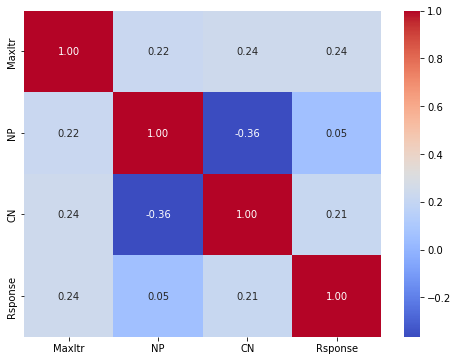

In [90]:
correlation_matrix = DOEResults.drop(columns =['Mean', 'RSD', 'Time']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

In [93]:
correlation_matrix

,MaxItr,NP,CN,Rsponse
MaxItr,1.000000,0.218970,0.238660,0.238595
NP,0.218970,1.000000,-0.364809,0.051693
CN,0.238660,-0.364809,1.000000,0.213856
Rsponse,0.238595,0.051693,0.213856,1.000000


In [ ]:
plt.figure(figsize = (10, 8))
plt.subplot(2, 2, 1)
df = DOEResults.sort_values(by = 'MaxItr')
plt.plot(df['MaxItr'], df['Rsponse'], 'o')
plt.title('MaxItr Factor')
plt.subplot(2, 2, 2)
df = DOEResults.sort_values(by = 'NP')
plt.plot(df['NP'], df['Rsponse'], 'o')
plt.title('NP Factor')
plt.subplot(2, 2, 3)
df = DOEResults.sort_values(by = 'CN')
plt.plot(df['CN'], df['Rsponse'], 'o')
plt.title('CN Factor')

In [ ]:
df = DOEResults.sort_values(by = 'NP')
plt.plot(df['NP'], df['Rsponse'], 'o')